In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as sf
spark = SparkSession.builder.appName('lrex').getOrCreate()
from pyspark.ml.regression import LinearRegression
from pyspark import SQLContext, SparkConf, SparkContext
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

In [4]:
import pandas as pd

In [5]:
import plotly.graph_objects as go

In [6]:
import seaborn as sns

In [7]:
Countries = spark.read.csv('covid19',inferSchema=True, header=True)
Countries=Countries.orderBy("date", ascending=False)


In [8]:
Countries.createOrReplaceTempView("Countries")
Countries=spark\
.sql(\
     "SELECT  location, total_cases_per_million, total_deaths_per_million \
     FROM Countries \
     Where date='2020-04-27'")


In [9]:
CountriesTest=Countries.select("*")
CountriesDeathRate=Countries.select("*")


In [10]:
CountriesDeathRate=CountriesDeathRate.orderBy("total_deaths_per_million", ascending=False)
CountriesDeathRate.createOrReplaceTempView("CountriesDeathRate")
CountriesDeathRate=spark.sql('select row_number() over (order by "location") as num, * from CountriesDeathRate')
CountriesDeathRate.show()

+---+--------------------+-----------------------+------------------------+
|num|            location|total_cases_per_million|total_deaths_per_million|
+---+--------------------+-----------------------+------------------------+
|  1|          San Marino|              15852.437|                1208.085|
|  2|             Belgium|               3980.632|                   612.1|
|  3|             Andorra|               9577.428|                 517.699|
|  4|               Spain|               4510.662|                 495.992|
|  5|               Italy|               3269.418|                 440.675|
|  6|              France|               1908.508|                 350.157|
|  7|      United Kingdom|               2251.421|                 305.394|
|  8|Sint Maarten (Dut...|               1725.666|                 303.158|
|  9|         Netherlands|               2208.654|                 261.163|
| 10|             Ireland|               3900.931|                 220.139|
| 11|       

In [11]:
CountriesDeathRate.createOrReplaceTempView("CountriesDeathRate")
CountriesDeathRate=spark\
.sql('SELECT location, total_cases_per_million, total_deaths_per_million \
FROM CountriesDeathRate \
WHERE num < 5')
CountriesDeathRate.show()
CountriesDeathRate = CountriesDeathRate.selectExpr("cast(total_cases_per_million as int) total_cases_per_million","cast(total_deaths_per_million as int) total_deaths_per_million")

+----------+-----------------------+------------------------+
|  location|total_cases_per_million|total_deaths_per_million|
+----------+-----------------------+------------------------+
|San Marino|              15852.437|                1208.085|
|   Belgium|               3980.632|                   612.1|
|   Andorra|               9577.428|                 517.699|
|     Spain|               4510.662|                 495.992|
+----------+-----------------------+------------------------+



In [12]:

CountriesTest.createOrReplaceTempView("CountriesTest")

In [13]:
CountriesTest=spark\
.sql(\
     "SELECT total_cases_per_million,total_deaths_per_million \
     FROM CountriesTest \
     Where location='Mexico' OR location= 'Denmark' OR location='Ireland' OR location='Netherlands'")


In [14]:
Countries=spark\
.sql(\
     "SELECT  location, total_cases_per_million, total_deaths_per_million \
     FROM Countries \
     Where date='2020-04-27'")


In [15]:
Countries=Countries.select("total_cases_per_million","total_deaths_per_million")

In [16]:
Countries = Countries.selectExpr("cast(total_cases_per_million as int) total_cases_per_million","cast(total_deaths_per_million as int) total_deaths_per_million")

In [17]:
CountriesTest=CountriesTest.selectExpr("cast(total_cases_per_million as int) total_cases_per_million","cast(total_deaths_per_million as int) total_deaths_per_million")

In [18]:
Countries=Countries.na.drop()


In [19]:
conf = SparkConf().setMaster('local').setAppName('ML_learning')

In [20]:

sqlcontext = SQLContext(sc)


In [21]:
data = Countries.select("*")


In [22]:
x1 = data.toPandas()['total_cases_per_million'].values.tolist()

In [23]:
y1 = data.toPandas()['total_deaths_per_million'].values.tolist()

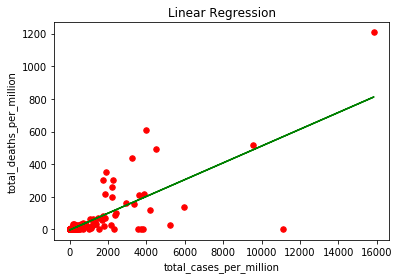

In [24]:
plt.scatter(x1, y1, color='red', s=30)
plt.xlabel('total_cases_per_million')
plt.ylabel('total_deaths_per_million')
plt.title('Linear Regression')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()

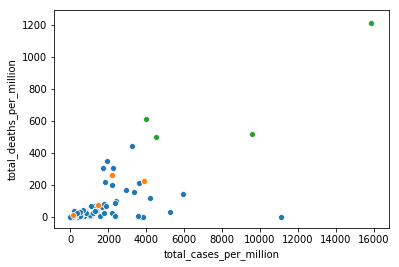

In [25]:
sns.scatterplot(x="total_cases_per_million",y="total_deaths_per_million",data=Countries.toPandas())
sns.scatterplot(x="total_cases_per_million",y="total_deaths_per_million",data=CountriesTest.toPandas())
sns.scatterplot(x="total_cases_per_million",y="total_deaths_per_million",data=CountriesDeathRate.toPandas())
